In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import os

import utilities

In [2]:
imdbsub, infosub = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
sub_tokenizer = infosub.features['text'].encoder

In [3]:
def fit_imdbsub(embed_d=16, lstm_d=16, epochs=10, batch=128, dense=0):
    if dense == 0:
        model = keras.models.Sequential([
            keras.layers.Embedding(sub_tokenizer.vocab_size, embed_d),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d)),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    else:
        model = keras.models.Sequential([
            keras.layers.Embedding(sub_tokenizer.vocab_size, embed_d),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d)),
            keras.layers.Dense(dense, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    model.summary()
        
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    
    history = model.fit(
        imdbsub['train'].padded_batch(batch),
        epochs=epochs,
        validation_data=imdbsub['test'].padded_batch(batch)
    )
    utilities.plot_train_val_metrics(history, ['loss', 'accuracy'])
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          130960    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 135,217
Trainable params: 135,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 200s 993ms/step - loss: 0.5841 - accuracy: 0.6832 - val_loss: 0.4584 - val_accuracy: 0.8055
Epoch 2/10
196/196 [==============================] - 187s 956ms/step - loss: 0.4534 - accuracy: 0.798

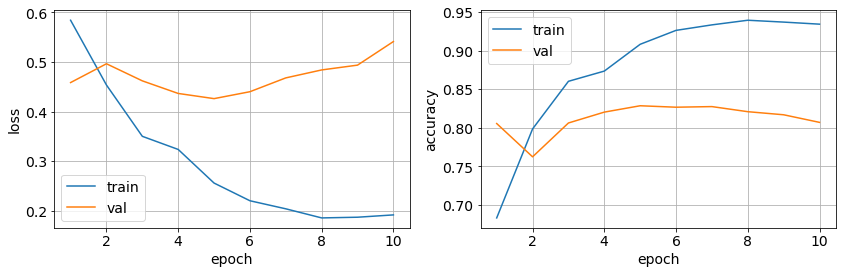

In [4]:
%%time
fit_imdbsub()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          130960    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 143,569
Trainable params: 143,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 598s 3s/step - loss: 0.6318 - accuracy: 0.6470 - val_loss: 0.4836 - val_accuracy: 0.7813
Epoch 2/10
196/196 [==============================] - 581s 3s/step - loss: 0.4199 - accuracy: 0.8213 - 

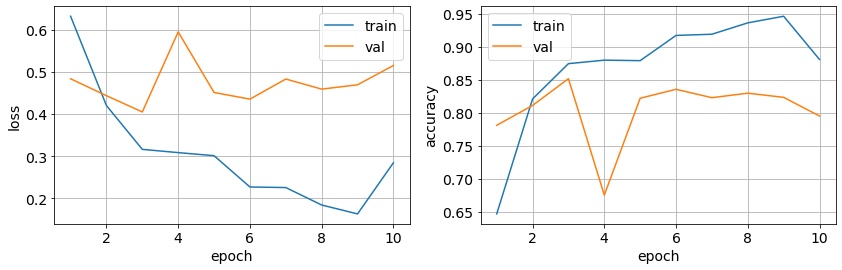

In [5]:
%%time
fit_imdbsub(lstm_d=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          130960    
                                                                 
 bidirectional_2 (Bidirectio  (None, 16)               1600      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 132,577
Trainable params: 132,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 169s 842ms/step - loss: 0.6203 - accuracy: 0.6524 - val_loss: 0.5005 - val_accuracy: 0.7871
Epoch 2/10
196/196 [==============================] - 171s 872ms/step - loss: 0.4947 - accuracy: 0.7

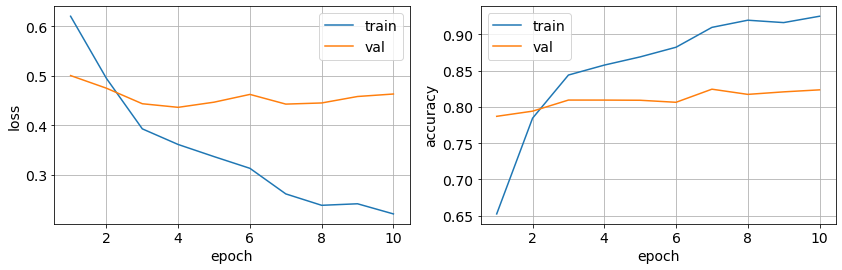

In [6]:
%%time
fit_imdbsub(lstm_d=8)

In [16]:
data_in = np.random.rand(5, 10, 16)

lstm = keras.layers.LSTM(8)
print(lstm(data_in).shape)

lstm = keras.layers.LSTM(8, return_sequences=True)
print(lstm(data_in).shape)

lstm = keras.layers.Bidirectional(keras.layers.LSTM(8))
print(lstm(data_in).shape)

lstm = keras.layers.Bidirectional(keras.layers.LSTM(8, return_sequences=True))
print(lstm(data_in).shape)

(5, 8)
(5, 10, 8)
(5, 16)
(5, 10, 16)


In [21]:
def fit_imdbsub2(embed_d=16, lstm_d1=16, lstm_d2=16, epochs=10, batch=128, dense=0):
    if dense == 0:
        model = keras.models.Sequential([
            keras.layers.Embedding(sub_tokenizer.vocab_size, embed_d),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d1, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d2)),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    else:
        model = keras.models.Sequential([
            keras.layers.Embedding(sub_tokenizer.vocab_size, embed_d),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d1, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(lstm_d2)),
            keras.layers.Dense(dense, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    model.summary()
        
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    
    history = model.fit(
        imdbsub['train'].padded_batch(batch),
        epochs=epochs,
        validation_data=imdbsub['test'].padded_batch(batch)
    )
    utilities.plot_train_val_metrics(history, ['loss', 'accuracy'])
    
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          130960    
                                                                 
 bidirectional_7 (Bidirectio  (None, None, 32)         4224      
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 141,489
Trainable params: 141,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [============================

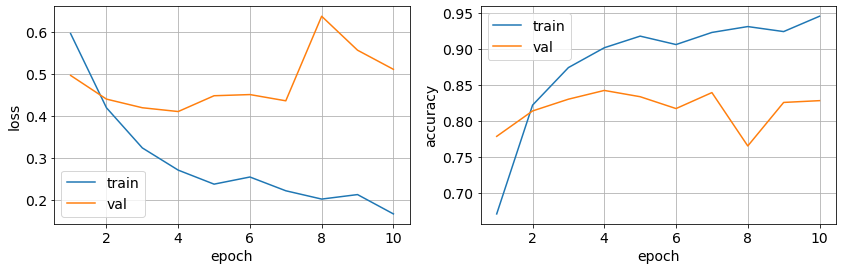

In [22]:
%%time
fit_imdbsub2()

In [23]:
data_in = np.random.rand(5, 10, 16)

conv1d = keras.layers.Conv1D(128, 5, activation='relu')
print(conv1d(data_in).shape)

gmp = keras.layers.GlobalMaxPooling1D()
print(gmp(conv1d(data_in)).shape)

(5, 6, 128)
(5, 128)


In [24]:
def fit_imdbsub3(embed_d=16, fil=128, kerlen=5, epochs=10, batch=128, dense=0):
    layers = (
        [keras.layers.Embedding(sub_tokenizer.vocab_size, embed_d),
         keras.layers.Conv1D(fil, kerlen, activation='relu'),
         keras.layers.GlobalMaxPooling1D()]
        + (keras.layers.Dense(dense, activation='relu') if dense > 0 else [])
        + [keras.layers.Dense(1, activation='sigmoid')]
    )
    model = keras.models.Sequential(layers)
    model.summary()
        
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    
    history = model.fit(
        imdbsub['train'].padded_batch(batch),
        epochs=epochs,
        validation_data=imdbsub['test'].padded_batch(batch)
    )
    utilities.plot_train_val_metrics(history, ['loss', 'accuracy'])
    
    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          130960    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         10368     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 141,457
Trainable params: 141,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 66s 332ms/step - loss: 0.6173 - accuracy: 0.6506 - val_loss:

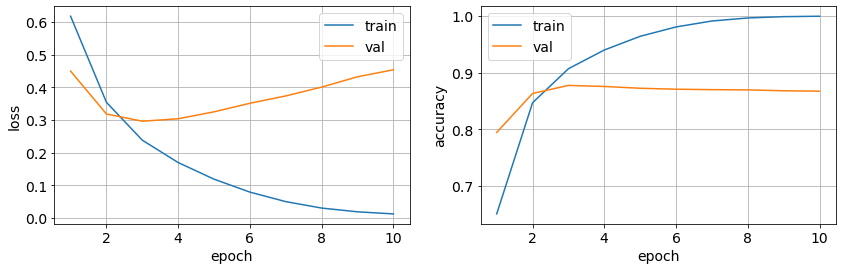

In [25]:
%%time
fit_imdbsub3()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 1)           8185      
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         768       
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,082
Trainable params: 9,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 46s 229ms/step - loss: 0.6826 - accuracy: 0.5699 - val_loss: 0.6

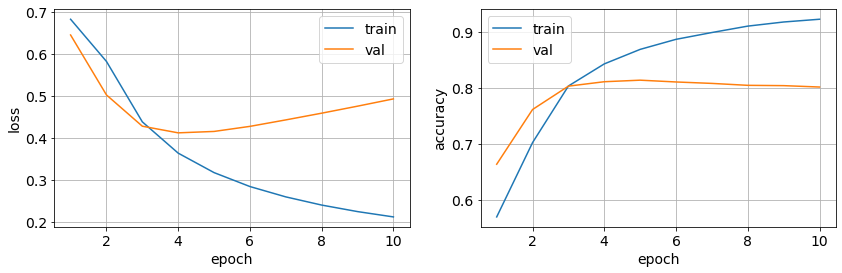

In [26]:
%%time
fit_imdbsub3(embed_d=1)